#### Instructions
###### Follow the instructions given in comments prefixed with ## and write your code below that.
###### Also fill the partial code in given blanks. 
###### Don't make any changes to the rest part of the codes

### Answer the questions given at the end of this notebook within your report.


### You would need to submit your GitHub repository link. Refer to the Section 6: Final Submission on the PDF document for the details.


In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial import distance
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import os

In [9]:
image_path = os.path.join(os.getcwd(), "Plaksha_Faculty.jpg")

# Read the image
img = cv2.imread(image_path)

## Convert the image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Loading the required haar-cascade xml classifier file
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# Applying the face detection method on the grayscale image.
## Change the parameters for better detection of faces in your case.
faces_rect = face_cascade.detectMultiScale(gray_img, 1.05, 4, minSize=(25, 25), maxSize=(50, 50))

# Define the text and font parameters
text = "Face Detected"  ## The text you want to write
font = cv2.FONT_HERSHEY_SIMPLEX  ## Font type
font_scale = 0.5  ## Font scale factor
font_color = (0, 0, 255)  ## Text color in BGR format (here, it's red)
font_thickness = 1  ## Thickness of the text

# Iterating through rectangles of detected faces
for (x, y, w, h) in faces_rect:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), 2)
    # Use cv2.putText to add the text to the image
    cv2.putText(img, text, (x, y - 10), font, font_scale, font_color, font_thickness)

## Display the image and window title should be "Total number of face detected are #"
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display
plt.title(f"Total number of faces detected are {len(faces_rect)}")  # Set title with face count
plt.axis("off")  # Hide axis for better visualization
plt.show()

C:\Users\anous\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


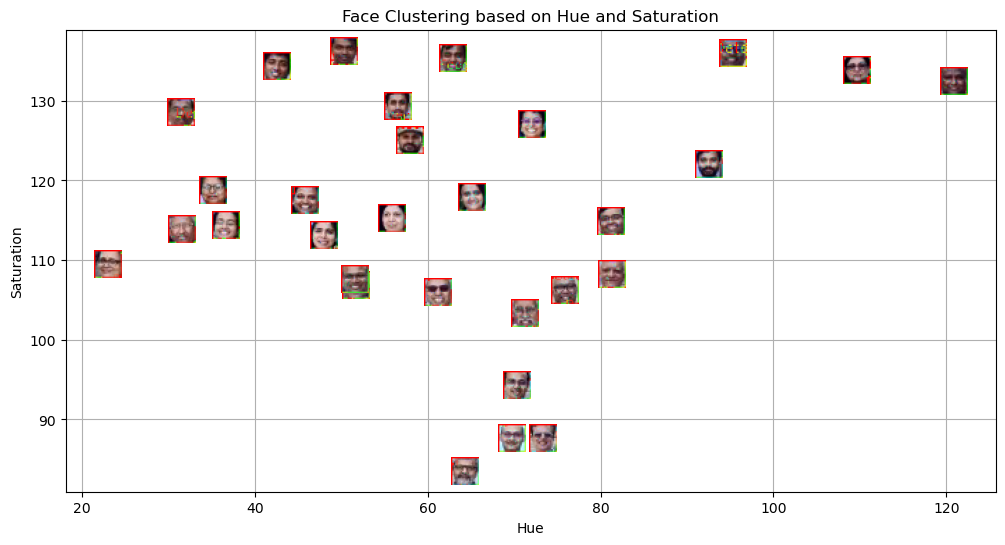

In [10]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Extract face region features (Hue and Saturation)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)  ## Convert the img from BGR to HSV and store in img_hsv
hue_saturation = []
face_images = []  # To store detected face images

for (x, y, w, h) in faces_rect:
    face = img_hsv[y:y + h, x:x + w]  # Extract the face region
    hue = np.mean(face[:, :, 0])  # Compute mean Hue
    saturation = np.mean(face[:, :, 1])  # Compute mean Saturation
    hue_saturation.append((hue, saturation))
    face_images.append(face)

hue_saturation = np.array(hue_saturation)

## Perform k-Means clustering on hue_saturation and store in kmeans
kmeans = KMeans(n_clusters=2, random_state=42).fit(hue_saturation)

# centroids = kmeans.cluster_centers_
# labels = kmeans.labels_

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers
for i, (x, y, w, h) in enumerate(faces_rect):
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1], "bo")  # Plot with blue markers

# Add labels and formatting
plt.xlabel("Hue")  ## X-axis label
plt.ylabel("Saturation")  ## Y-axis label
plt.title("Face Clustering based on Hue and Saturation")  ## Title of the plot
plt.grid(True)  ## Show grid
plt.show()  ## Display the plot


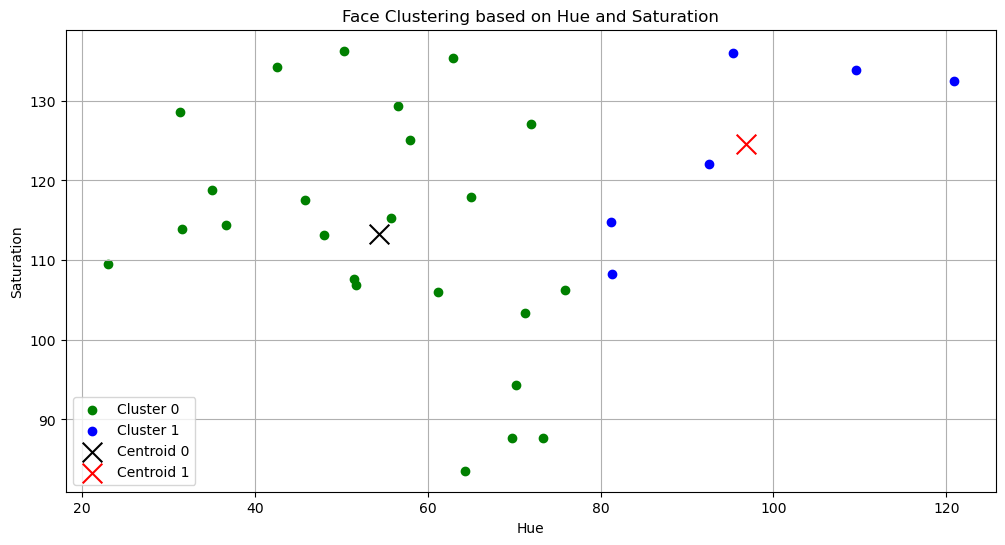

In [11]:
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))

# Convert lists to numpy arrays
cluster_0_points = np.array(cluster_0_points)
cluster_1_points = np.array(cluster_1_points)

# Plot points for cluster 0 in green
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], c='green', label="Cluster 0")

# Plot points for cluster 1 in blue
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], c='blue', label="Cluster 1")

# Calculate and plot centroids
centroid_0 = kmeans.cluster_centers_[0]
centroid_1 = kmeans.cluster_centers_[1]

# Plot both the centroid for cluster 0 and cluster 1
plt.scatter(centroid_0[0], centroid_0[1], c='black', marker='x', s=200, label="Centroid 0")
plt.scatter(centroid_1[0], centroid_1[1], c='red', marker='x', s=200, label="Centroid 1")

# Add labels and formatting
plt.xlabel("Hue")  ## X-axis label
plt.ylabel("Saturation")  ## Y-axis label
plt.title("Face Clustering based on Hue and Saturation")  ## Title of the plot
plt.legend()  ## Add a legend
plt.grid(True)  ## Add grid
plt.show()  ## Show the plot


In [12]:
image_path = os.path.join(os.getcwd(), "Dr_Shashi_Tharoor.jpg")

# Read the image
template_img = cv2.imread(image_path)

# Convert the template image to grayscale
template_gray = cv2.cvtColor(template_img, cv2.COLOR_BGR2GRAY)

# Load the Haar cascade classifier for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# Detect face in the template image after converting it to gray and store it in template_faces
template_faces = face_cascade.detectMultiScale(template_gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Draw rectangles around the detected faces
for (x, y, w, h) in template_faces:
    cv2.rectangle(template_img, (x, y), (x + w, y + h), (0, 255, 0), 3)

# Display the image with the detected face
plt.imshow(cv2.cvtColor(template_img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display
plt.title("Detected Face in Template")  # Set title with face count
plt.axis("off")  # Hide axis for better visualization
plt.show()

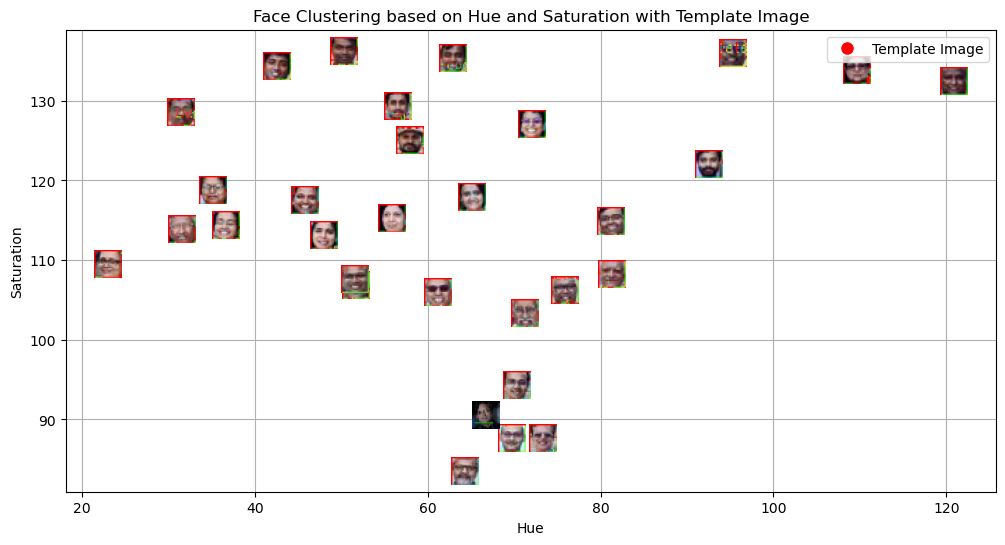

In [13]:
# Convert the template image to HSV color space and store it in template_hsv
template_hsv = cv2.cvtColor(template_img, cv2.COLOR_BGR2HSV)

# Extract hue and saturation features from the template image as we did for detected faces
template_hue = np.mean(template_hsv[:, :, 0])  # Extract mean Hue
template_saturation = np.mean(template_hsv[:, :, 1])  # Extract mean Saturation

# Predict the cluster label for the template image and store it in template_label
template_label = kmeans.predict([[template_hue, template_saturation]])[0]

# Create a figure and axis for visualization
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers (similar to previous code)
for i, (x, y, w, h) in enumerate(faces_rect):
    color = 'red' if kmeans.labels_[i] == 0 else 'blue'
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1], 'o', markersize=5, color=color)

# Plot the template image in the respective cluster
color = 'red' if template_label == 0 else 'blue'
im = OffsetImage(cv2.cvtColor(cv2.resize(template_img, (20, 20)), cv2.COLOR_BGR2RGB))
ab = AnnotationBbox(im, (template_hue, template_saturation), frameon=False, pad=0)
ax.add_artist(ab)
plt.plot(template_hue, template_saturation, 'o', markersize=8, color=color, label="Template Image")

# Add labels and formatting
plt.xlabel("Hue")  ## X-axis label
plt.ylabel("Saturation")  ## Y-axis label
plt.title("Face Clustering based on Hue and Saturation with Template Image")  ## Title of the plot
plt.grid(True)  ## Add grid
plt.legend()  ## Add legend
plt.show()  ## Show the plot

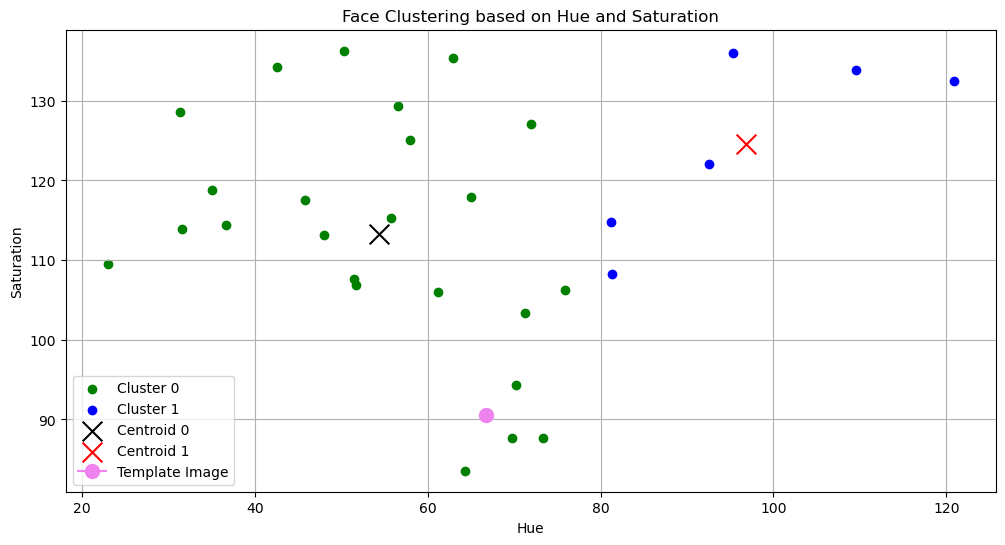

In [14]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))

for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))

# Convert lists to numpy arrays
cluster_0_points = np.array(cluster_0_points)
cluster_1_points = np.array(cluster_1_points)

# Plot points for cluster 0 in green
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], c='green', label="Cluster 0")

# Plot points for cluster 1 in blue
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], c='blue', label="Cluster 1")

# Calculate and plot centroids for both clusters
centroid_0 = kmeans.cluster_centers_[0]
centroid_1 = kmeans.cluster_centers_[1]

# Plot centroids
plt.scatter(centroid_0[0], centroid_0[1], c='black', marker='x', s=200, label="Centroid 0")
plt.scatter(centroid_1[0], centroid_1[1], c='red', marker='x', s=200, label="Centroid 1")

# Plot the template image point in violet
plt.plot(template_hue, template_saturation, marker='o', c='violet', markersize=10, label="Template Image")

# Add labels and formatting
plt.xlabel("Hue")  ## X-axis label
plt.ylabel("Saturation")  ## Y-axis label
plt.title("Face Clustering based on Hue and Saturation")  ## Title of the plot
plt.legend()  ## Add a legend
plt.grid(True)  ## Add grid
plt.show()  ## Show the plot

## Report:
## Answer the following questions within your report:


#### 1. What are the common distance metrics used in distance-based classification algorithms? 

#### 2. What are some real-world applications of distance-based classification algorithms? 

#### 3. Explain various distance metrics. 

#### 4. What is the role of cross validation in model performance? 

#### 5. Explain variance and bias in terms of KNN? 